In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
df1=df.drop(columns=['Date','Location','Rainfall','WindGustDir','WindGustSpeed','WindDir3pm','WindDir9am','Cloud9am','RainTomorrow','RISK_MM','Cloud3pm','Cloud9am','RainToday','Evaporation','Sunshine'])

In [8]:
df1

,MinTemp,MaxTemp,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
142189,2.8,23.4,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
142190,3.6,25.3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
142191,5.4,26.9,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


In [9]:
df1.isnull().sum()

MinTemp           637
MaxTemp           322
WindSpeed9am     1348
WindSpeed3pm     2630
Humidity9am      1774
Humidity3pm      3610
Pressure9am     14014
Pressure3pm     13981
Temp9am           904
Temp3pm          2726
dtype: int64

In [10]:
df1['MinTemp']=df1['MinTemp'].fillna(df1['MinTemp'].mean())

In [11]:
df1['MaxTemp']=df1['MaxTemp'].fillna(df1['MaxTemp'].mean())

In [12]:
df1['WindSpeed9am']=df1['WindSpeed9am'].fillna(df1['WindSpeed9am'].mean())

In [13]:
df1['WindSpeed3pm']=df1['WindSpeed3pm'].fillna(df1['WindSpeed3pm'].mean())

In [14]:
df1['Humidity9am']=df1['Humidity9am'].fillna(df1['Humidity9am'].mean())

In [15]:
df1['Humidity3pm']=df1['Humidity3pm'].fillna(df1['Humidity3pm'].mean())

In [16]:
df1['Pressure9am']=df1['Pressure9am'].fillna(df1['Pressure9am'].mean())

In [17]:
df1['Pressure3pm']=df1['Pressure3pm'].fillna(df1['Pressure3pm'].mean())

In [18]:
df1['Temp9am']=df1['Temp9am'].fillna(df1['Temp9am'].mean())

In [19]:
df1['Temp3pm']=df1['Temp3pm'].fillna(df1['Temp3pm'].mean())

In [20]:
df1.isnull().sum()

MinTemp         0
MaxTemp         0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
dtype: int64

In [21]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [22]:
df1=df.select_dtypes(include=['int64','float64'])
df1.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


<Axes: >

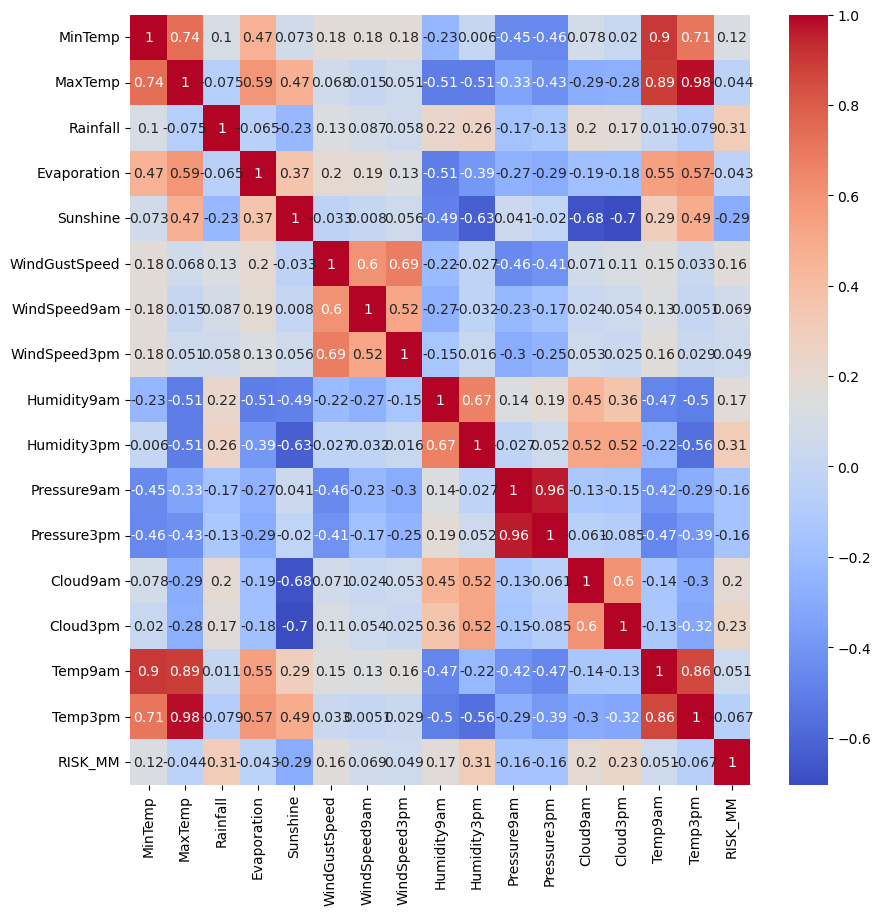

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

In [24]:
le=LabelEncoder()
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=le.fit_transform(df[column])

In [25]:
df = df.dropna()

In [26]:
X=df.drop(columns='RainTomorrow')
Y=df['RainTomorrow']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

## LOGISTIC REGRESSION

In [28]:
model1=LogisticRegression()
model1.fit(X_train,Y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
Y_pred=model1.predict(X_test)
Y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [30]:
cm1=confusion_matrix(Y_test,Y_pred)
cm1

array([[8921,  138],
       [ 316, 2243]], dtype=int64)

In [31]:
cr1=classification_report(Y_test,Y_pred)
print(cr1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9059
           1       0.94      0.88      0.91      2559

    accuracy                           0.96     11618
   macro avg       0.95      0.93      0.94     11618
weighted avg       0.96      0.96      0.96     11618



In [32]:
accuracy=accuracy_score(Y_test,Y_pred)*100
accuracy

96.09227061456362

In [33]:
precision=metrics.precision_score(Y_test,Y_pred)*100
precision

94.20411591768165

In [34]:
sen_recall=metrics.recall_score(Y_test,Y_pred)*100
sen_recall

87.65142633841344

In [35]:
f1_score=metrics.f1_score(Y_test,Y_pred)*100
f1_score

90.80971659919028

## DECISION TREE CLASSIFIER

In [37]:
model2=DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [38]:
Y_pred2=model2.predict(X_test)
Y_pred2

array([1, 1, 0, ..., 1, 1, 0])

In [39]:
cm2=confusion_matrix(Y_test,Y_pred2)
cm2

array([[9059,    0],
       [   0, 2559]], dtype=int64)

In [40]:
cr2=classification_report(Y_test,Y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9059
           1       1.00      1.00      1.00      2559

    accuracy                           1.00     11618
   macro avg       1.00      1.00      1.00     11618
weighted avg       1.00      1.00      1.00     11618



In [41]:
accuracy=accuracy_score(Y_test,Y_pred2)*100
accuracy

100.0

In [42]:
precision=metrics.precision_score(Y_test,Y_pred2)*100
precision

100.0

In [43]:
sen_recall=metrics.recall_score(Y_test,Y_pred2)*100
sen_recall

100.0

In [44]:
f1_score=metrics.f1_score(Y_test,Y_pred2)*100
f1_score

100.0

## SVC

In [46]:
model3=SVC()
model3.fit(X_train,Y_train)

SVC()

In [47]:
Y_pred3=model3.predict(X_test)
Y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
cm3=confusion_matrix(Y_test,Y_pred3)
cm3

array([[9058,    1],
       [2206,  353]], dtype=int64)

In [49]:
cr3=classification_report(Y_test,Y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      9059
           1       1.00      0.14      0.24      2559

    accuracy                           0.81     11618
   macro avg       0.90      0.57      0.57     11618
weighted avg       0.85      0.81      0.75     11618



In [50]:
accuracy=accuracy_score(Y_test,Y_pred3)*100
accuracy

81.00361508004819

In [51]:
precision=metrics.precision_score(Y_test,Y_pred3)*100
precision

99.71751412429379

In [52]:
sen_recall=metrics.recall_score(Y_test,Y_pred3)*100
sen_recall

13.794450957405235

In [53]:
f1_score=metrics.f1_score(Y_test,Y_pred3)*100
f1_score

24.236182629591486

## RandomForestClassifier

In [54]:
model4=RandomForestClassifier()
model4.fit(X_train,Y_train)

RandomForestClassifier()

In [55]:
Y_pred4=model4.predict(X_test)
Y_pred4

array([1, 1, 0, ..., 1, 1, 0])

In [56]:
cm=confusion_matrix(Y_test,Y_pred4)
cm

array([[9059,    0],
       [   0, 2559]], dtype=int64)

In [57]:
cr=classification_report(Y_test,Y_pred4)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9059
           1       1.00      1.00      1.00      2559

    accuracy                           1.00     11618
   macro avg       1.00      1.00      1.00     11618
weighted avg       1.00      1.00      1.00     11618



In [58]:
accuracy=accuracy_score(Y_test,Y_pred4)*100
precision=metrics.precision_score(Y_test,Y_pred4)*100
semsitivity_recall=metrics.recall_score(Y_test,Y_pred4)*100
f1_score=metrics.f1_score(Y_test,Y_pred4)*100
print('accuracy:',accuracy)
print('precision:',precision)
print('semsitivity_recall:',semsitivity_recall)
print('f1_score:',f1_score)

accuracy: 100.0
precision: 100.0
semsitivity_recall: 100.0
f1_score: 100.0
